In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [3]:
admissions = pd.read_csv("admissions.csv")

admissions.head()
admissions.info()
admissions.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Data preprocessing.

In [4]:
features = admissions.iloc[:,0:-1]
labels = admissions.iloc[:, -1]

print(features.head())
print(labels.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  
0         1  
1         1  
2         1  
3         1  
4         0  
0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64


### One-hot-encoding of features data.

In [6]:
features = pd.get_dummies(features)
print(features)

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
495         496        332          108                  5  4.5   4.0  9.02   
496         497        337          117                  5  5.0   5.0  9.87   
497         498        330          120                  5  4.5   5.0  9.56   
498         499        312          103                  4  4.0   5.0  8.43   
499         500        327          113                  4  4.5   4.5  9.04   

     Research  
0           1  
1           1  
2  

### Train-test split.

In [9]:
feat_train, feat_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.3, random_state = 42)

print(feat_train.head())
print(labels_train.head())

     Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
5             6        330          115                  5  4.5   3.0  9.34   
116         117        299          102                  3  4.0   3.5  8.62   
45           46        322          110                  5  5.0   4.0  9.10   
16           17        317          107                  3  4.0   3.0  8.70   
462         463        307          105                  4  3.0   3.0  7.94   

     Research  
5           1  
116         0  
45          1  
16          0  
462         0  
5      0.90
116    0.56
45     0.88
16     0.66
462    0.62
Name: Chance of Admit , dtype: float64


### Standarization

In [7]:
from sklearn.compose import ColumnTransformer

#Fetching float and integer variables and assigning them to variable with columns
num_feats = features.select_dtypes(include = ['float64', 'int64'])
num_cols = num_feats.columns

print(num_cols)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research'],
      dtype='object')


In [10]:
ct = ColumnTransformer([('only_numeric', StandardScaler(), num_cols, )], remainder = 'passthrough')
feat_train_scaled = ct.fit_transform(feat_train)
feat_test_scaled = ct.transform(feat_test)

print(feat_train_scaled, feat_test_scaled)

[[-1.75020856  1.22318504  1.27980924 ... -0.5291228   1.28550609
   0.88127734]
 [-0.96385041 -1.61322396 -0.86815536 ...  0.01556244  0.07349047
  -1.13471657]
 [-1.46683625  0.49120853  0.45366901 ...  0.56024767  0.88150088
   0.88127734]
 ...
 [ 0.67970895 -1.33873276 -1.3638395  ... -1.61849327 -2.23270591
  -1.13471657]
 [ 1.29604372 -0.69825331 -0.37247122 ...  0.56024767 -1.50886325
  -1.13471657]
 [-1.06303072 -0.24076799 -0.20724318 ...  0.01556244 -0.54935089
  -1.13471657]] [[ 0.77180495  1.5891733   1.44503728 ...  0.01556244  1.62217709
   0.88127734]
 [-1.26847564 -0.24076799  0.12321291 ...  0.56024767  0.78049958
   0.88127734]
 [ 0.86390095 -0.14927093 -0.37247122 ... -1.07380803 -1.5593639
  -1.13471657]
 ...
 [-0.21291381  0.67420265  0.94935314 ...  0.56024767  0.35966083
  -1.13471657]
 [ 0.06337419 -0.42376212 -0.53769927 ...  0.56024767 -0.81868769
  -1.13471657]
 [ 1.23228495 -0.42376212 -0.20724318 ...  1.64961814 -0.01067728
  -1.13471657]]


In [11]:
#Turning feat_train_scaled into dataframe.
feat_train_stand = pd.DataFrame(feat_train_scaled, columns = feat_train.columns)

print(feat_train_stand)

     Serial No.  GRE Score  TOEFL Score  University Rating       SOP  \
0     -1.750209   1.223185     1.279809           1.647869  1.133935   
1     -0.963850  -1.613224    -0.868155          -0.084125  0.632828   
2     -1.466836   0.491209     0.453669           1.647869  1.635043   
3     -1.672281   0.033723    -0.042015          -0.084125  0.632828   
4      1.487320  -0.881247    -0.372471           0.781872 -0.369388   
..          ...        ...          ...                ...       ...   
345   -1.034693   1.131688     0.618897           0.781872  1.133935   
346    0.127133  -0.972745    -0.372471          -0.950123 -0.870496   
347    0.679709  -1.338733    -1.363839          -1.816120 -1.371604   
348    1.296044  -0.698253    -0.372471          -0.950123 -0.870496   
349   -1.063031  -0.240768    -0.207243          -0.950123  0.632828   

         LOR       CGPA  Research  
0   -0.529123  1.285506  0.881277  
1    0.015562  0.073490 -1.134717  
2    0.560248  0.881501  0.

### Creating the model in the function.

In [18]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.01

In [31]:
def create_model(feat_train, learning_rate):
    model = Sequential()
    input = InputLayer(input_shape = feat_train.shape[1])
    model.add(input)
    model.add(Dense(64, activation = 'relu'))
    model.add(Dense(1))
    opt = Adam(learning_rate = 0.01)
    model.compile(loss = 'mse', metrics = ['mae'], optimizer = opt)
    return model

print(create_model(feat_train_stand, learning_rate))

### Applying early stopping, which stops learning process as the loss function converge (reaches plateau).

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
def fit_model(feat_train, labels_train, learning_rate, epochs):
    model = create_model(feat_train, learning_rate)
    stop = EarlyStopping(
        monitor = 'loss',
        min_delta = 0,
        #Defining the number of epochs to countinue after reachinh plateau. 
        patience = 20,
        verbose = 0,
        mode = 'min',
        baseline = None,
        restore_best_weights = False,)
    #znależć w dokumentacji jak uczyć model.
    model_fitting = model.fit(
        feat_test_scaled,
        labels_test,
        epochs = num_epochs,
        batch_size = 1,
        verbose = 1,
        validation_split = 0.2,
        #Argument callbacks must be defined 
        callbacks = [stop]
    )
    return model_fitting

### Evaluating the model.

In [33]:
learning_rate = 0.01
num_epochs = 1000

evaluation = fit_model(feat_train, labels_train, learning_rate, num_epochs)
val_mse, val_mae = evaluation.model.evaluate(feat_test_scaled, labels_test, verbose = 1)

print(val_mse)

Epoch 1/1000
120/120 [==============================] - 11s 19ms/step - loss: 0.1322 - mae: 0.2687 - val_loss: 0.0861 - val_mae: 0.2503
Epoch 2/1000
120/120 [==============================] - 1s 8ms/step - loss: 0.0633 - mae: 0.1916 - val_loss: 0.0134 - val_mae: 0.0962
Epoch 3/1000
120/120 [==============================] - 1s 6ms/step - loss: 0.0099 - mae: 0.0815 - val_loss: 0.0147 - val_mae: 0.0887
Epoch 4/1000
120/120 [==============================] - 1s 5ms/step - loss: 0.0181 - mae: 0.1008 - val_loss: 0.0052 - val_mae: 0.0539
Epoch 5/1000
120/120 [==============================] - 1s 6ms/step - loss: 0.0057 - mae: 0.0552 - val_loss: 0.0047 - val_mae: 0.0549
Epoch 6/1000
120/120 [==============================] - 1s 6ms/step - loss: 0.0042 - mae: 0.0505 - val_loss: 0.0044 - val_mae: 0.0518
Epoch 7/1000
120/120 [==============================] - 1s 6ms/step - loss: 0.0045 - mae: 0.0537 - val_loss: 0.0046 - val_mae: 0.0529
Epoch 8/1000
120/120 [==============================] - 1s 8

### Results
As we can see, loss function converged at epoch number 48. Mean square error was 0.004817200358957052.

### Drawing the plot describing loss function chnges over traning.

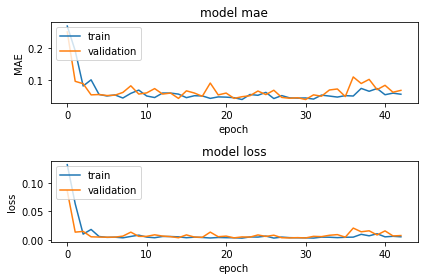

<Figure size 432x288 with 0 Axes>

In [34]:
#Drawing mean absolute error changes over trainnig.
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(evaluation.history['mae'])
ax1.plot(evaluation.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')
#Drawing loss function changes over trainnig
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(evaluation.history['loss'])
ax2.plot(evaluation.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

#This code line keep plots from overlapping each other.
fig.tight_layout()

plt.show()
plt.clf()

### Getting R2 score.

In [39]:
def model_predict(feat_test_scaled, labels_train):
    predicted_values = model(feat_test_scaled)
    r2_score = r2_score(labels_test, predicted_values)
    return r2_score
    
prediction = model_predict(feat_test_scaled,labels_train)
print(prediction)

#For now I'm struggling with NameError (despite the fact, that the model is defined).

NameError: name 'model' is not defined

### Getting model performance.

In [1]:
model_perform = model_predict(feat_test_scaled, labels_test)
print(model_perform)

NameError: name 'model_predict' is not defined